# 🚗 Car Price Prediction: EDA 🚀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import category_encoders as ce
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import joblib
from numpy import log1p, expm1


# Loading Dataset

In [2]:
df_sample_submission=pd.read_csv("/kaggle/input/playground-series-s4e9/sample_submission.csv")
df_train=pd.read_csv("/kaggle/input/playground-series-s4e9/train.csv")
df_test=pd.read_csv("/kaggle/input/playground-series-s4e9/test.csv")

In [3]:
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [4]:
df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


In [7]:
print(df_train.shape)
print(df_test.shape)

(188533, 13)
(125690, 12)


In [8]:
# Removing id column
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [9]:
print(df_train.shape)
print(df_test.shape)

(188533, 12)
(125690, 11)


In [10]:
if df_train.duplicated().sum() > 0:
    print("There are duplicate rows in df_train.")
else:
    print("No duplicate rows found in df_train.")

No duplicate rows found in df_train.


# Checking the Nature of Null Values

Training data shape: (188533, 12)
Testing data shape: (125690, 11)
Missing values in training data:
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64
Missing values in testing data:
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64


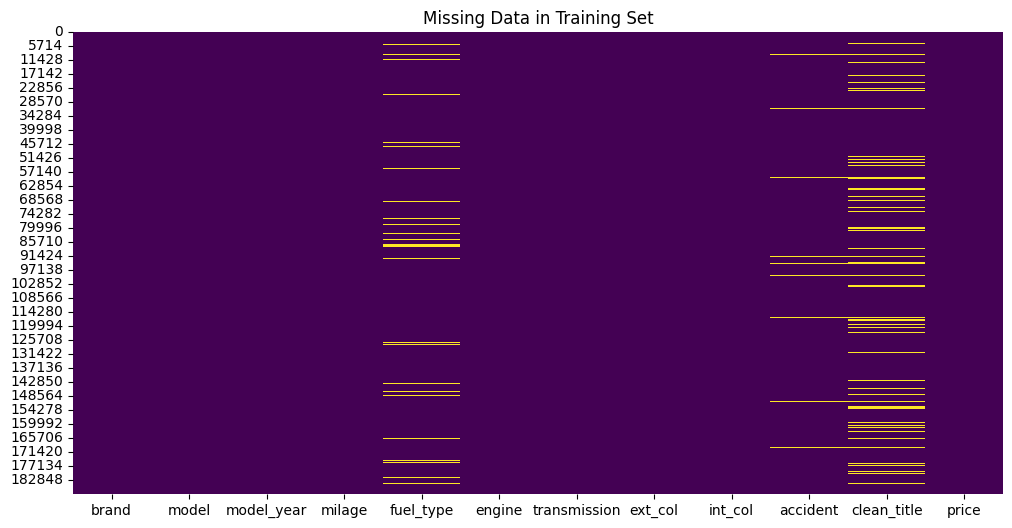

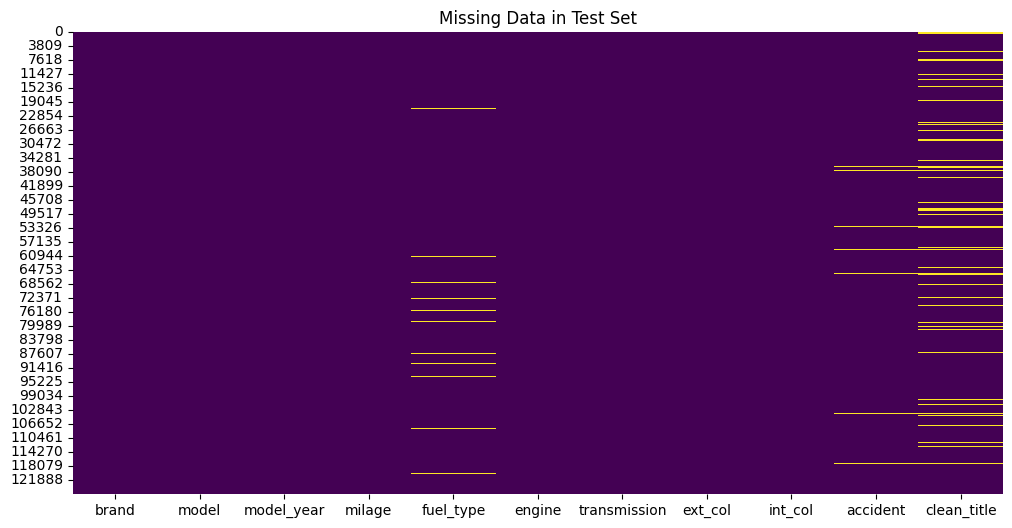

              train_missing  test_missing
accident           1.300568      1.298433
brand              0.000000      0.000000
clean_title       11.360876     11.328666
engine             0.000000      0.000000
ext_col            0.000000      0.000000
fuel_type          2.696080      2.691543
int_col            0.000000      0.000000
milage             0.000000      0.000000
model              0.000000      0.000000
model_year         0.000000      0.000000
price              0.000000           NaN
transmission       0.000000      0.000000
Missing rows in training set: 25923
Missing rows in testing set: 17231


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [11]:
import pandas as pd
import numpy as np

# Check shape of train and test data
print("Training data shape:", df_train.shape)
print("Testing data shape:", df_test.shape)

# Check for missing values in both datasets
print("Missing values in training data:")
print(df_train.isnull().sum())

print("Missing values in testing data:")
print(df_test.isnull().sum())

# Visualizing missing data (optional, but helps with inspection)
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize missing values in the train and test set
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data in Training Set")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df_test.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data in Test Set")
plt.show()

# If you want to calculate the percentage of missing data in each column:
missing_train = df_train.isnull().mean() * 100
missing_test = df_test.isnull().mean() * 100

# Compare the missing percentages across both datasets
comparison = pd.DataFrame({'train_missing': missing_train, 'test_missing': missing_test})
print(comparison)

# Optionally, check if rows with missing values in train appear similarly in test
# This checks if the missingness is similar across both datasets (useful if there is overlap)
missing_train_rows = df_train[df_train.isnull().any(axis=1)]
missing_test_rows = df_test[df_test.isnull().any(axis=1)]

print(f"Missing rows in training set: {len(missing_train_rows)}")
print(f"Missing rows in testing set: {len(missing_test_rows)}")


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


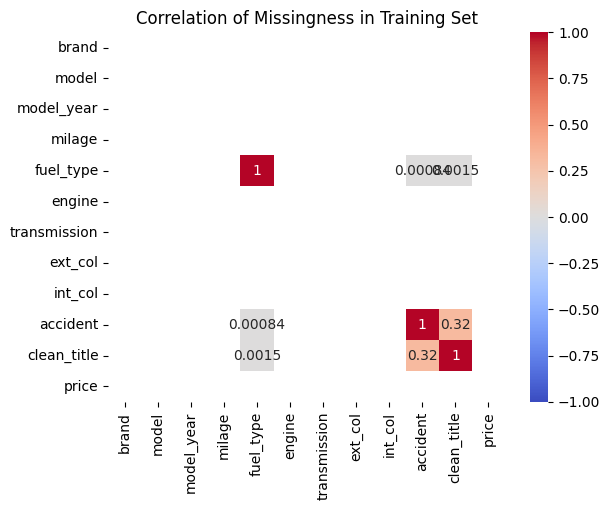

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


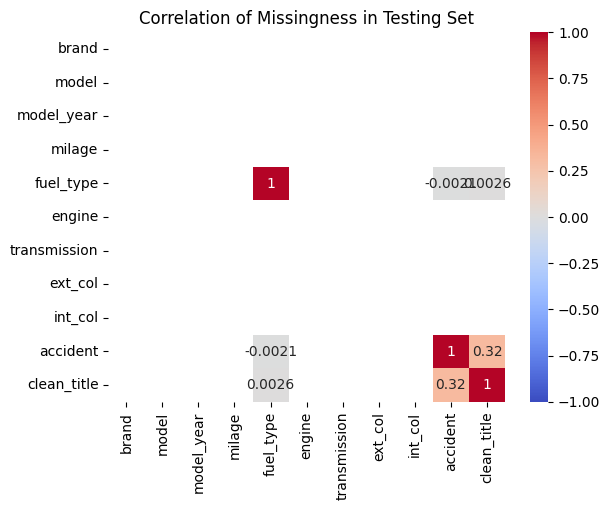

In [12]:
# Create missingness binary mask
missing_train_mask = df_train.isnull().astype(int)
missing_test_mask = df_test.isnull().astype(int)

# Calculate correlation of missingness across features
corr_train_missing = missing_train_mask.corr()
corr_test_missing = missing_test_mask.corr()

# Visualize the correlation of missingness
sns.heatmap(corr_train_missing, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation of Missingness in Training Set")
plt.show()

sns.heatmap(corr_test_missing, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation of Missingness in Testing Set")
plt.show()


# Handeling Missing Values

In [13]:
df_train.isnull().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [14]:
df_test.isnull().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

In [15]:
# Calculate missing percentage for df_train and df_test
missing_train = df_train.isna().mean() * 100
missing_test = df_test.isna().mean() * 100

# Display the missing percentages for columns with missing values
print("Columns in df_train with missing values:")
print(missing_train[missing_train > 0])

print("\nColumns in df_test with missing values:")
print(missing_test[missing_test > 0])

Columns in df_train with missing values:
fuel_type       2.696080
accident        1.300568
clean_title    11.360876
dtype: float64

Columns in df_test with missing values:
fuel_type       2.691543
accident        1.298433
clean_title    11.328666
dtype: float64


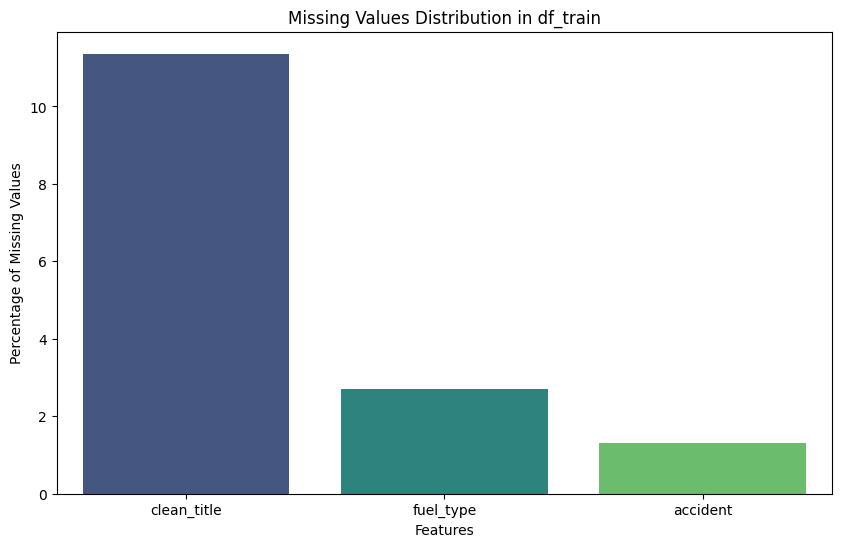

In [16]:
missing_values = df_train.isnull().mean() * 100
missing_values = missing_values[missing_values >0]
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values Distribution in df_train')
plt.show()

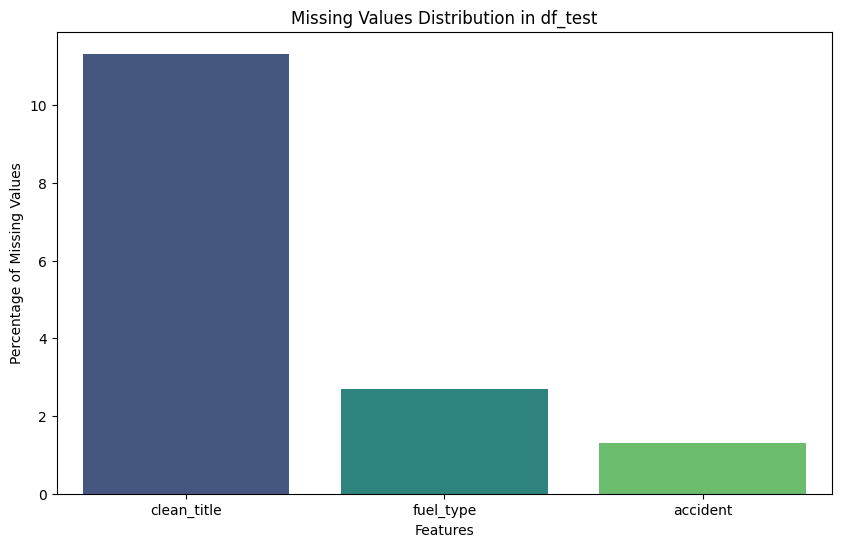

In [17]:
missing_values = df_test.isnull().mean() * 100
missing_values = missing_values[missing_values >0]
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values Distribution in df_test')
plt.show()

In [18]:
for fuel in df_train['fuel_type'].unique():
    print(fuel)

Gasoline
E85 Flex Fuel
nan
Hybrid
Diesel
Plug-In Hybrid
–
not supported


In [19]:
df_train['fuel_type'].value_counts(dropna=False)

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
NaN                 5083
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [20]:
df_train['fuel_type'].isnull().sum()

5083

In [21]:
df_train['fuel_type'] = df_train['fuel_type'].fillna('Unknown')
df_test['fuel_type'] = df_test['fuel_type'].fillna('Unknown')

In [22]:
df_train['fuel_type'] = df_train['fuel_type'].replace('–', 'Unknown')
df_test['fuel_type'] = df_test['fuel_type'].replace('–', 'Unknown')

In [23]:
for fuel in df_train['fuel_type'].unique():
    print(fuel)

Gasoline
E85 Flex Fuel
Unknown
Hybrid
Diesel
Plug-In Hybrid
not supported


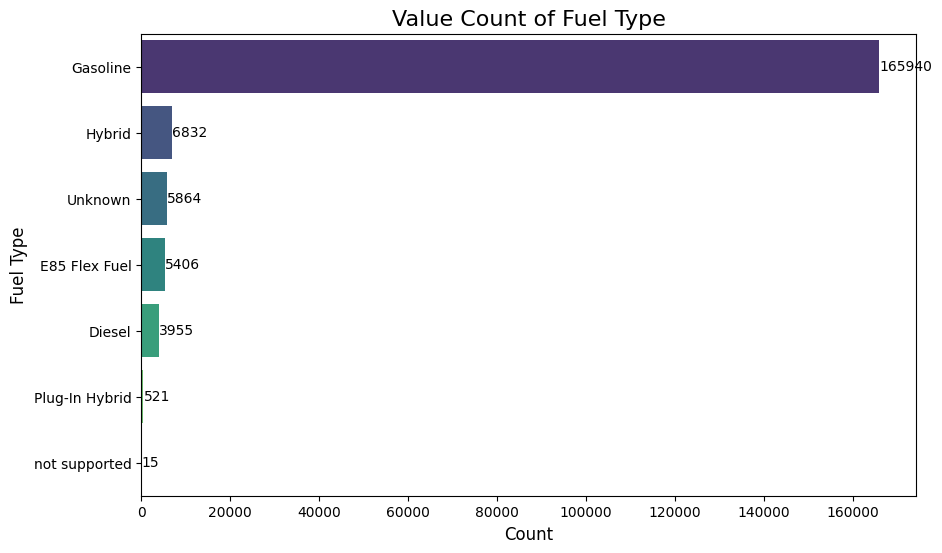

In [24]:
plt.figure(figsize=(10,6))

# create horizontal bar chart
sns.barplot(x=df_train['fuel_type'].value_counts().values,
           y=df_train['fuel_type'].value_counts().index,
           palette='viridis')

# add labels for each bar
for index, value in enumerate(df_train['fuel_type'].value_counts().values):
    plt.text(value, index, f'{value}', va='center', fontsize=10)

# title and labels
plt.title('Value Count of Fuel Type', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Fuel Type', fontsize=12)
plt.show();

In [25]:
for fuel in df_train['accident'].unique():
    print(fuel)

None reported
At least 1 accident or damage reported
nan


In [26]:
df_train['accident'].isnull().sum()

2452

In [27]:
df_train['accident'].value_counts(dropna=False)

accident
None reported                             144514
At least 1 accident or damage reported     41567
NaN                                         2452
Name: count, dtype: int64

In [28]:
df_train['accident'] = df_train['accident'].fillna('No')
df_test['accident'] = df_test['accident'].fillna('No')

In [29]:
df_train['accident'].value_counts(dropna=False)

accident
None reported                             144514
At least 1 accident or damage reported     41567
No                                          2452
Name: count, dtype: int64

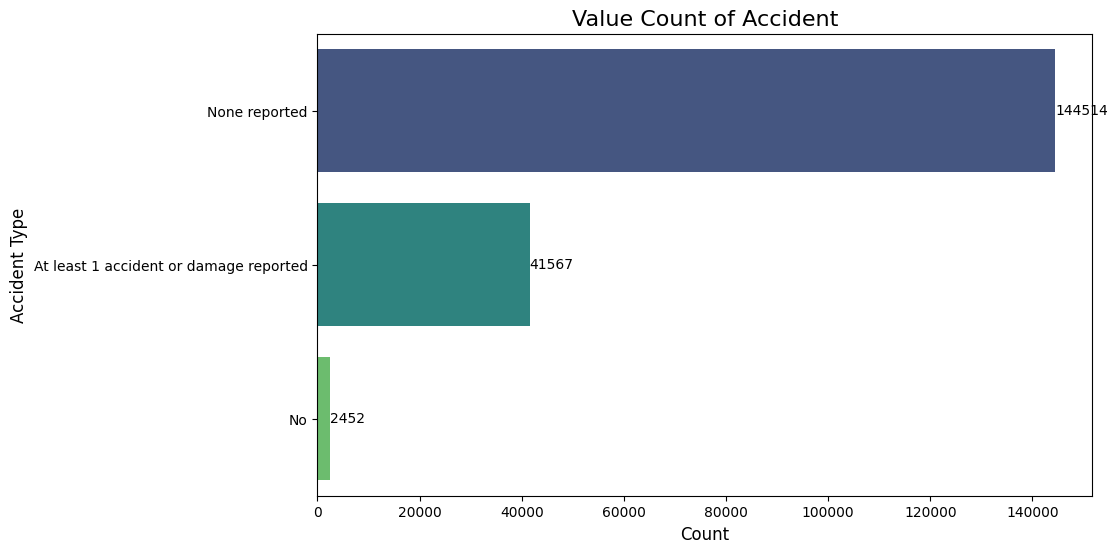

In [30]:
plt.figure(figsize=(10,6))

# create horizontal bar chart
sns.barplot(x=df_train['accident'].value_counts().values,
           y=df_train['accident'].value_counts().index,
           palette='viridis')

# add labels for each bar
for index, value in enumerate(df_train['accident'].value_counts().values):
    plt.text(value, index, f'{value}', va='center', fontsize=10)

# title and labels
plt.title('Value Count of Accident', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Accident Type', fontsize=12)
plt.show();

In [31]:
for fuel in df_train['clean_title'].unique():
    print(fuel)

Yes
nan


In [32]:
df_train['clean_title'].isnull().sum()

21419

In [33]:
df_train['clean_title'].value_counts(dropna=False)

clean_title
Yes    167114
NaN     21419
Name: count, dtype: int64

In [34]:
df_train['clean_title'] = df_train['clean_title'].fillna('No')
df_test['clean_title'] = df_test['clean_title'].fillna('No')

In [35]:
df_train['clean_title'].value_counts(dropna=False)

clean_title
Yes    167114
No      21419
Name: count, dtype: int64

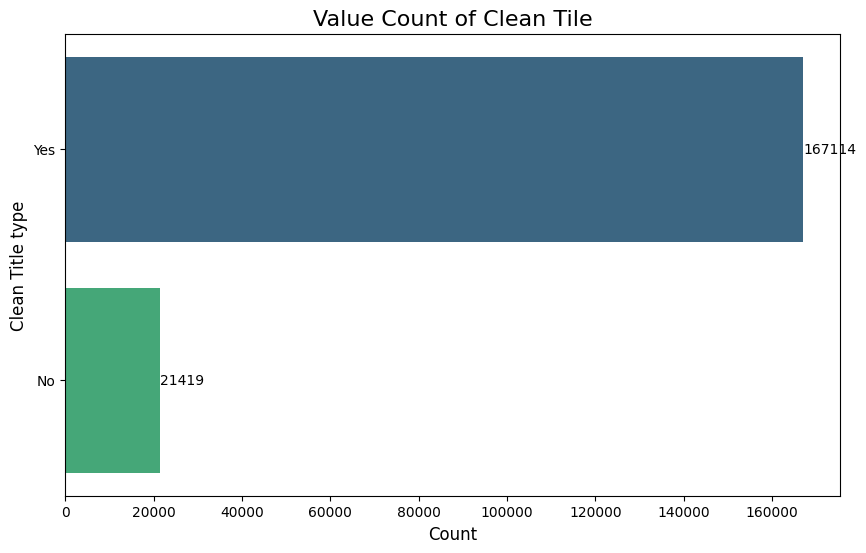

In [36]:
plt.figure(figsize=(10,6))

# create horizontal bar chart
sns.barplot(x=df_train['clean_title'].value_counts().values,
           y=df_train['clean_title'].value_counts().index,
           palette='viridis')

# add labels for each bar
for index, value in enumerate(df_train['clean_title'].value_counts().values):
    plt.text(value, index, f'{value}', va='center', fontsize=10)

# title and labels
plt.title('Value Count of Clean Tile', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Clean Title type', fontsize=12)
plt.show();

In [37]:
df_train.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [38]:
df_test.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

# Feature Engenerring

In [39]:
# The function extract_engine_feature(df) extracts various engine-related features from a column named 'engine' in the given DataFrame (df).
# It does this using regular expressions (re) to identify specific patterns in engine descriptions.

import re
def extract_engine_feature(df):
    # extract horsepower
    df['Horsepower'] = df['engine'].apply(lambda x: float(re.search(r'(\d+(\.\d+)?)HP', x).group(1)) if re.search(r'(\d+(\.\d+)?)HP', x) else None)
    
    # extract displacement
    df['Displacement'] = df['engine'].apply(lambda x: float(re.search(r'(\d+\.\d+)L|(\d+\.\d+) Liter', x).group(1) or re.search(r'(\d+\.\d+)L|(\d+\.\d+) Liter', x).group(2)) if re.search(r'(\d+\.\d+)L|(\d+\.\d+) Liter', x) else None)
    
    # extract engine type
    df['Engine Type'] = df['engine'].apply(lambda x: re.search(r'(V\d+|I\d+|Flat \d+|Straight \d+)', x).group(1) if re.search(r'(V\d+|I\d+|Flat \d+|Straight \d+)', x) else None)
    
    # extract cylinder count
    df['Cylinder Count'] = df['engine'].apply(lambda x: int(re.search(r'(\d+) Cylinder', x).group(1)) if re.search(r'(\d+) Cylinder', x) else None)

# Extract Fuel Type
    fuel_types = ['Gasoline', 'Diesel', 'Electric', 'Hybrid', 'Flex Fuel']
    df['Fuel Type'] = df['engine'].apply(lambda x: next((fuel for fuel in fuel_types if fuel in x), None))
    
    return df

In [40]:
# applying the function to both train and test datasets
df_train = extract_engine_feature(df_train)
df_test = extract_engine_feature(df_test)

In [41]:
df_train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Displacement,Engine Type,Cylinder Count,Fuel Type
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,None,4.0,Gasoline
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,None,8.0,Gasoline
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,None,8.0,Flex Fuel
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,None,8.0,Gasoline
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,None,4.0,Gasoline


In [42]:
df_test.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,Horsepower,Displacement,Engine Type,Cylinder Count,Fuel Type
0,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes,240.0,2.0,None,4.0,Gasoline
1,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes,395.0,3.0,Straight 6,6.0,Gasoline
2,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,No,NaN,3.5,V6,NaN,None
3,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,No,NaN,2.0,None,NaN,None
4,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes,252.0,2.0,None,4.0,Gasoline


In [43]:
df_train.isnull().sum()

brand                 0
model                 0
model_year            0
milage                0
fuel_type             0
engine                0
transmission          0
ext_col               0
int_col               0
accident              0
clean_title           0
price                 0
Horsepower        33259
Displacement       6770
Engine Type       99563
Cylinder Count    37855
Fuel Type         31546
dtype: int64

In [44]:
df_test.isnull().sum()

brand                 0
model                 0
model_year            0
milage                0
fuel_type             0
engine                0
transmission          0
ext_col               0
int_col               0
accident              0
clean_title           0
Horsepower        22181
Displacement       4438
Engine Type       66299
Cylinder Count    25150
Fuel Type         21015
dtype: int64

In [45]:
import datetime
current_year = datetime.datetime.now().year

df_train['model_age'] = current_year - df_train['model_year']
df_test['model_age'] = current_year - df_test['model_year']

In [46]:
df_train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Displacement,Engine Type,Cylinder Count,Fuel Type,model_age
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,None,4.0,Gasoline,18
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,None,8.0,Gasoline,23
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,None,8.0,Flex Fuel,23
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,None,8.0,Gasoline,8
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,None,4.0,Gasoline,4


In [47]:
columns_to_drop = ['engine', 'model','model_year', 'Engine Type', 'Fuel Type']
df_train.drop(columns=[col for col in columns_to_drop if col in df_train.columns], inplace=True)
df_test.drop(columns=[col for col in columns_to_drop if col in df_test.columns], inplace=True)

In [48]:
df_train.sample(3)

,brand,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Displacement,Cylinder Count,model_age
62325,Ford,8025,Gasoline,10-Speed A/T,White,Black,None reported,Yes,32300,430.0,7.3,8.0,5
144318,Lamborghini,22000,Gasoline,7-Speed M/T,Gray,Black,None reported,Yes,92888,571.0,6.2,12.0,4
157676,Toyota,140401,Gasoline,A/T,White,Gray,None reported,Yes,33000,270.0,3.5,6.0,10


In [49]:
# Enable IterativeImputer (required in some versions of scikit-learn)
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer, SimpleImputer  # Import missing modules

# Iterative Imputer: Limit max iterations and increase tolerance
imputer = IterativeImputer(max_iter=10, tol=1e-3, random_state=0)

# Apply only to relevant columns that require more sophisticated imputation
df_train[['Horsepower', 'Displacement']] = imputer.fit_transform(df_train[['Horsepower', 'Displacement']])
df_test[['Horsepower', 'Displacement']] = imputer.transform(df_test[['Horsepower', 'Displacement']])

# Simple Imputer for less complex columns
simple_imputer = SimpleImputer(strategy='mean')
df_train['Cylinder Count'] = simple_imputer.fit_transform(df_train[['Cylinder Count']])
df_test['Cylinder Count'] = simple_imputer.transform(df_test[['Cylinder Count']])


In [50]:
df_train.isna().sum()

brand             0
milage            0
fuel_type         0
transmission      0
ext_col           0
int_col           0
accident          0
clean_title       0
price             0
Horsepower        0
Displacement      0
Cylinder Count    0
model_age         0
dtype: int64

In [51]:
df_test.isna().sum()

brand             0
milage            0
fuel_type         0
transmission      0
ext_col           0
int_col           0
accident          0
clean_title       0
Horsepower        0
Displacement      0
Cylinder Count    0
model_age         0
dtype: int64

In [52]:
for transmission in df_train['transmission'].unique():
    print(transmission)

A/T
Transmission w/Dual Shift Mode
7-Speed A/T
8-Speed A/T
10-Speed Automatic
1-Speed A/T
6-Speed A/T
10-Speed A/T
9-Speed A/T
8-Speed Automatic
9-Speed Automatic
5-Speed A/T
Automatic
7-Speed Automatic with Auto-Shift
CVT Transmission
5-Speed M/T
M/T
6-Speed M/T
6-Speed Automatic
4-Speed Automatic
7-Speed M/T
2-Speed A/T
1-Speed Automatic
Automatic CVT
4-Speed A/T
6-Speed Manual
Transmission Overdrive Switch
8-Speed Automatic with Auto-Shift
7-Speed Manual
7-Speed Automatic
9-Speed Automatic with Auto-Shift
6-Speed Automatic with Auto-Shift
6-Speed Electronically Controlled Automatic with O
F
CVT-F
8-Speed Manual
Manual
–
2
6 Speed At/Mt
5-Speed Automatic
2-Speed Automatic
8-SPEED A/T
7-Speed
Variable
Single-Speed Fixed Gear
8-SPEED AT
10-Speed Automatic with Overdrive
7-Speed DCT Automatic
SCHEDULED FOR OR IN PRODUCTION
6-Speed
6 Speed Mt


In [53]:
# Mapping transmission columns

def map_transmission(transmission):
    transmission = transmission.strip().lower()
    
    if any(kw in transmission for kw in ['a/t', 'automatic']):
        return 'Automatic'
    elif any(kw in transmission for kw in ['m/t', 'manual']):
        return 'Manual'
    elif any(kw in transmission for kw in ['cvt', 'variator']):
        return 'Variator'
    elif any(kw in transmission for kw in ['tiptronic']):
        return 'Triptronic'
    else:
        return 'Other'

In [54]:
df_train['transmission'] = df_train['transmission'].apply(map_transmission)
df_test['transmission'] = df_test['transmission'].apply(map_transmission)

print(df_train['transmission'].value_counts())
print("-------------------------")
print(df_test['transmission'].value_counts())

transmission
Automatic    150302
Other         19868
Manual        16358
Variator       2005
Name: count, dtype: int64
-------------------------
transmission
Automatic    100296
Other         13260
Manual        10785
Variator       1349
Name: count, dtype: int64


In [55]:
for accident in df_train['accident'].unique():
    print(accident)

None reported
At least 1 accident or damage reported
No


In [56]:
for clean_title in df_train['clean_title'].unique():
    print(clean_title)

Yes
No


In [57]:
for transmission in df_train['transmission'].unique():
    print(transmission)

Automatic
Other
Variator
Manual


In [58]:
# def mapping_columns(df):cle
#     # replace values in the 'accident' column
#     df['accident'] = df['accident'].replace({
#         'At least 1 accident or damage reported': 1,
#         'None reported': 0,
#         'No': 2,
        
#     })
    
#     # replace values in the 'clean_title' column 
#     df['clean_title'] = df['clean_title'].replace({
#         'Yes': 1,
#         'No': 0
#     })
    
#     # replace values in the 'transmission' column
#     df['transmission'] = df['transmission'].replace({'Automatic':1,
#                                                     'Manual':2,
#                                                     'Variator':3,
#                                                     'Other':4})
    
#     return df

In [59]:
# df_train = mapping_columns(df_train)
# df_test = mapping_columns(df_test)

## Encoding 

In [60]:
df_train.sample(5)

,brand,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Displacement,Cylinder Count,model_age
90849,Honda,110500,Gasoline,Manual,Black,Red,At least 1 accident or damage reported,Yes,3500,240.000000,2.0,4.000000,21
74954,Chevrolet,170000,Gasoline,Other,Blue,Black,None reported,Yes,15000,394.000000,4.2,8.000000,19
139735,RAM,23600,Gasoline,Automatic,Black,Black,None reported,Yes,85000,395.000000,5.7,8.000000,3
60741,BMW,382,Gasoline,Automatic,Blue,Black,None reported,No,95998,371.828961,4.4,6.374268,2
67476,Ford,55212,Gasoline,Automatic,Diamond Black,Black,None reported,No,32541,324.100570,3.5,6.374268,5


In [61]:
df_train.head()

,brand,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Displacement,Cylinder Count,model_age
0,MINI,213000,Gasoline,Automatic,Yellow,Gray,None reported,Yes,4200,172.0,1.6,4.0,18
1,Lincoln,143250,Gasoline,Automatic,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8.0,23
2,Chevrolet,136731,E85 Flex Fuel,Automatic,Blue,Gray,None reported,Yes,13900,320.0,5.3,8.0,23
3,Genesis,19500,Gasoline,Other,Black,Black,None reported,Yes,45000,420.0,5.0,8.0,8
4,Mercedes-Benz,7388,Gasoline,Automatic,Black,Beige,None reported,Yes,97500,208.0,2.0,4.0,4


In [62]:
# Loop through each column and print the unique values
for col in df_train.columns:
    print(f"Unique values in column '{col}':")
    print(df_train[col].unique())
    print('-' * 50)  # Adding a separator for readability


Unique values in column 'brand':
['MINI' 'Lincoln' 'Chevrolet' 'Genesis' 'Mercedes-Benz' 'Audi' 'Ford'
 'BMW' 'Tesla' 'Cadillac' 'Land' 'GMC' 'Toyota' 'Hyundai' 'Volvo'
 'Volkswagen' 'Buick' 'Rivian' 'RAM' 'Hummer' 'Alfa' 'INFINITI' 'Jeep'
 'Porsche' 'McLaren' 'Honda' 'Lexus' 'Dodge' 'Nissan' 'Jaguar' 'Acura'
 'Kia' 'Mitsubishi' 'Rolls-Royce' 'Maserati' 'Pontiac' 'Saturn' 'Bentley'
 'Mazda' 'Subaru' 'Ferrari' 'Aston' 'Lamborghini' 'Chrysler' 'Lucid'
 'Lotus' 'Scion' 'smart' 'Karma' 'Plymouth' 'Suzuki' 'FIAT' 'Saab'
 'Bugatti' 'Mercury' 'Polestar' 'Maybach']
--------------------------------------------------
Unique values in column 'milage':
[213000 143250 136731 ...   4721   2922 134603]
--------------------------------------------------
Unique values in column 'fuel_type':
['Gasoline' 'E85 Flex Fuel' 'Unknown' 'Hybrid' 'Diesel' 'Plug-In Hybrid'
 'not supported']
--------------------------------------------------
Unique values in column 'transmission':
['Automatic' 'Other' 'Variator' '

In [63]:
# # Encoding categorical variables
# categorical_columns = ['brand', 'fuel_type', 'ext_col', 'int_col', 'accident', 'clean_title' , 'transmission']
# lb = LabelEncoder()

# for col in categorical_columns:
#     if col in df_train.columns:
#         df_train[col] = lb.fit_transform(df_train[col])
#         df_test[col] = lb.transform(df_test[col])

In [64]:
df_train.head()

,brand,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Displacement,Cylinder Count,model_age
0,MINI,213000,Gasoline,Automatic,Yellow,Gray,None reported,Yes,4200,172.0,1.6,4.0,18
1,Lincoln,143250,Gasoline,Automatic,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8.0,23
2,Chevrolet,136731,E85 Flex Fuel,Automatic,Blue,Gray,None reported,Yes,13900,320.0,5.3,8.0,23
3,Genesis,19500,Gasoline,Other,Black,Black,None reported,Yes,45000,420.0,5.0,8.0,8
4,Mercedes-Benz,7388,Gasoline,Automatic,Black,Beige,None reported,Yes,97500,208.0,2.0,4.0,4


In [65]:
import joblib
from sklearn.preprocessing import LabelEncoder

# Assuming your dataframes are named df_train and df_test
categorical_columns = ['brand', 'fuel_type', 'ext_col', 'int_col', 'accident', 'clean_title', 'transmission']

# Create a dictionary to hold LabelEncoders for each column
label_encoders = {}

# Create copies of the original dataframes
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

# Fit and transform your training data, then transform test data
for col in categorical_columns:
    if col in df_train.columns:
        # Create a new LabelEncoder for each column
        lb = LabelEncoder()
        
        # Fit the encoder on the training data and transform it
        df_train_encoded[col] = lb.fit_transform(df_train[col])
        
        # Transform the test data with the already fitted encoder
        df_test_encoded[col] = lb.transform(df_test[col])
        
        # Save the encoder for later use
        label_encoders[col] = lb

#                 Save all the LabelEncoders to individual .pkl files
# -------- Needes to uncomment this below 2-line to save the encoder file ----------
# for col, encoder in label_encoders.items():
 #   joblib.dump(encoder, f'{col}_encoder.pkl')

# Optionally, check the encoded copies
print("Encoded training set sample:")
df_train_encoded.head()




Encoded training set sample:


,brand,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Displacement,Cylinder Count,model_age
0,31,213000,2,0,312,71,2,1,4200,172.0,1.6,4.0,18
1,28,143250,2,0,263,10,0,1,4999,252.0,3.9,8.0,23
2,9,136731,1,0,38,71,2,1,13900,320.0,5.3,8.0,23
3,16,19500,2,2,29,14,2,1,45000,420.0,5.0,8.0,8
4,36,7388,2,0,29,10,2,1,97500,208.0,2.0,4.0,4


In [66]:
print("Encoded training set sample:")
df_test_encoded.head()

Encoded training set sample:


,brand,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,Horsepower,Displacement,Cylinder Count,model_age
0,26,98000,2,0,304,10,2,1,240.000000,2.0,4.000000,10
1,26,9142,3,0,263,14,2,1,395.000000,3.0,6.000000,5
2,14,28121,2,0,304,57,2,0,324.100570,3.5,6.374268,3
3,3,61258,2,0,261,14,2,0,244.553252,2.0,6.374268,9
4,3,59000,2,0,128,14,2,1,252.000000,2.0,4.000000,7


In [67]:
import pandas as pd

# Create a DataFrame to compare original and encoded brand values
brand_comparison = pd.DataFrame({
    'Original Brand': df_train['fuel_type'].unique(),
    'Encoded Value': df_train_encoded['fuel_type'].unique()
})

# Display the comparison
print(brand_comparison)


   Original Brand  Encoded Value
0        Gasoline              2
1   E85 Flex Fuel              1
2         Unknown              5
3          Hybrid              3
4          Diesel              0
5  Plug-In Hybrid              4
6   not supported              6


In [68]:
import pandas as pd

# Create a DataFrame to compare original and encoded fuel_type values with their counts
fuel_comparison = pd.DataFrame({
    'Original Fuel Type': df_train['fuel_type'].value_counts().index,  
    'Original Count': df_train['fuel_type'].value_counts().values,  
    'Encoded Value': df_train_encoded['fuel_type'].unique()
})

# Display the comparison
print(fuel_comparison)

  Original Fuel Type  Original Count  Encoded Value
0           Gasoline          165940              2
1             Hybrid            6832              1
2            Unknown            5864              5
3      E85 Flex Fuel            5406              3
4             Diesel            3955              0
5     Plug-In Hybrid             521              4
6      not supported              15              6


In [69]:
df_train_encoded.head()

,brand,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Displacement,Cylinder Count,model_age
0,31,213000,2,0,312,71,2,1,4200,172.0,1.6,4.0,18
1,28,143250,2,0,263,10,0,1,4999,252.0,3.9,8.0,23
2,9,136731,1,0,38,71,2,1,13900,320.0,5.3,8.0,23
3,16,19500,2,2,29,14,2,1,45000,420.0,5.0,8.0,8
4,36,7388,2,0,29,10,2,1,97500,208.0,2.0,4.0,4


In [70]:
# import joblib
# from sklearn.preprocessing import LabelEncoder

# # Assuming your dataframe is named df_train and df_test
# categorical_columns = ['brand', 'fuel_type', 'ext_col', 'int_col', 'accident', 'clean_title', 'transmission']

# # Create a dictionary to hold LabelEncoders for each column
# label_encoders = {}

# # Fit and transform your training data, then transform test data
# for col in categorical_columns:
#     if col in df_train.columns:
#         # Create a new LabelEncoder for each column
#         lb = LabelEncoder()
        
#         # Fit the encoder on the training data and transform it
#         df_train[col] = lb.fit_transform(df_train[col])
        
#         # Transform the test data with the already fitted encoder
#         df_test[col] = lb.transform(df_test[col])
        
#         # Save the encoder for later use
#         label_encoders[col] = lb

# # Save all the LabelEncoders to individual .pkl files
# for col, encoder in label_encoders.items():
#     joblib.dump(encoder, f'{col}_encoder.pkl')



In [71]:
# import joblib
# from sklearn.preprocessing import LabelEncoder

# # Assuming your code is defined above
# categorical_columns = ['brand', 'fuel_type', 'ext_col', 'int_col', 'accident', 'clean_title', 'transmission']
# lb = LabelEncoder()

# # Fit and transform your training data
# for col in categorical_columns:
#     if col in df_train.columns:
#         df_train[col] = lb.fit_transform(df_train[col])
#         df_test[col] = lb.transform(df_test[col])

# # Save the LabelEncoder instance to a .pkl file
# joblib.dump(lb, 'label_encoder.pkl')


In [72]:
#print(label_encoder.classes_)


In [73]:
# Loop through each column and print the unique values
for col in df_train.columns:
    print(f"Unique values in column '{col}':")
    print(df_train_encoded[col].unique())
    print('-' * 50)  # Adding a separator for readability


Unique values in column 'brand':
[31 28  9 16 36  3 14  4 52  8 26 15 53 19 55 54  7 45 44 18  1 20 22 43
 35 17 27 11 39 21  0 24 38 46 32 42 48  5 34 50 13  2 25 10 30 29 49 56
 23 40 51 12 47  6 37 41 33]
--------------------------------------------------
Unique values in column 'milage':
[213000 143250 136731 ...   4721   2922 134603]
--------------------------------------------------
Unique values in column 'fuel_type':
[2 1 5 3 0 4 6]
--------------------------------------------------
Unique values in column 'transmission':
[0 2 3 1]
--------------------------------------------------
Unique values in column 'ext_col':
[312 263  38  29 304 272 128 129 252 226  94 234 168  90 297  22 122 220
 179 307 102 216  37 205  48  46  35  31 103   0 115 171 317 208  36 188
 124 306 169  55 316 215 194  87 105 158  44 233  58  73 298 268 283   7
  77 281  93 318  30  88 219 296 227 112 270  51 181  91 189 274  12 200
 167 292 276 280 286 136 223 162 271 212 290  63 265  82 247   2 101 173
 23

In [74]:
df_train.reset_index(drop=True, inplace=True)

In [75]:
df_train.sample(5)

,brand,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Displacement,Cylinder Count,model_age
147633,Lexus,53782,Gasoline,Automatic,Silver,Black,None reported,Yes,72999,383.000000,5.7,8.000000,4
84794,Subaru,79635,Gasoline,Variator,Gray,Black,None reported,Yes,18500,175.000000,2.5,4.000000,11
154885,Ford,17000,Gasoline,Automatic,White,Black,None reported,Yes,62000,300.000000,2.3,4.000000,3
184691,BMW,25981,Gasoline,Automatic,Alpine White,Black,None reported,No,25698,371.828961,4.4,6.374268,4
166343,Dodge,138450,Gasoline,Automatic,Gray,Black,At least 1 accident or damage reported,Yes,7500,370.000000,5.7,8.000000,12


### Saving the clean csv file

In [76]:
#df_train_encoded.to_csv('df_train_clean.csv', index=False)
#df_test_encoded.to_csv('df_test_clean.csv', index=False)

# EDA

In [77]:
train=pd.read_csv("/kaggle/input/playground-series-s4e9/train.csv")
test=pd.read_csv("/kaggle/input/playground-series-s4e9/test.csv")

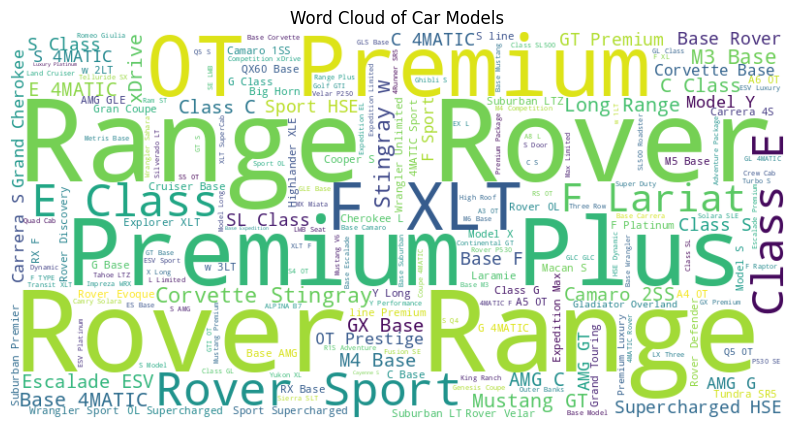

In [78]:
from wordcloud import WordCloud

plt.figure(figsize=(10, 6))
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(' '.join(train['model']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Car Models')
plt.show()

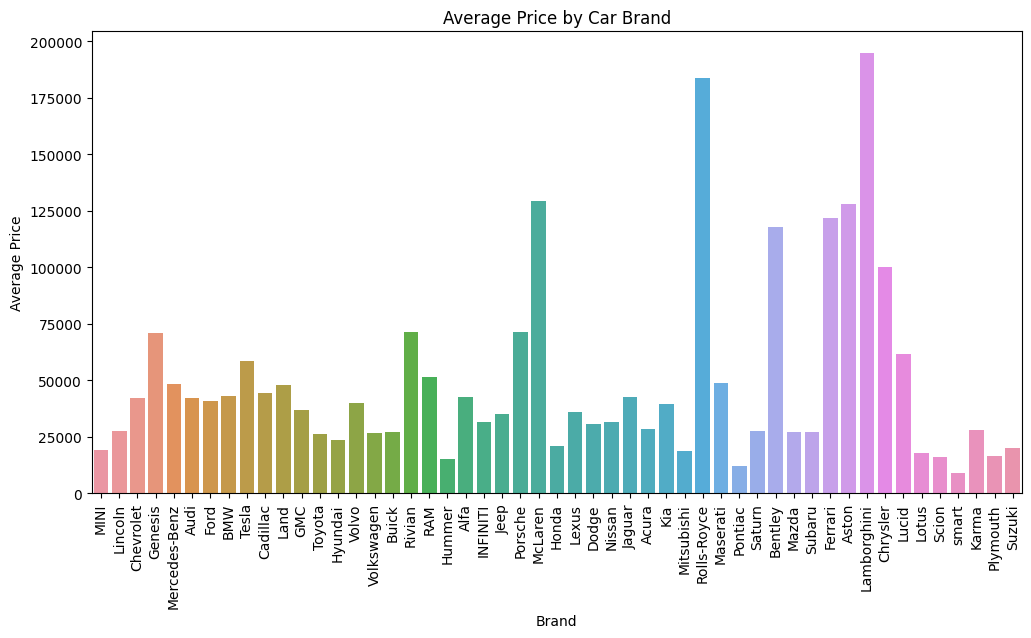

In [79]:
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price', data=train[:10000], errorbar=None)
plt.title('Average Price by Car Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


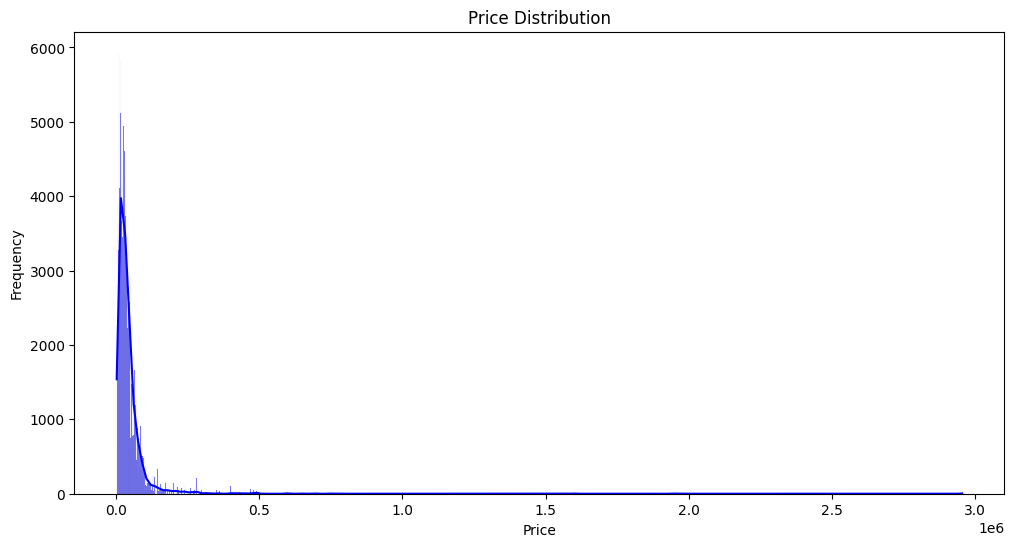

In [80]:
# Plot histogram with KDE for price distribution
plt.figure(figsize=(12, 6))
sns.histplot(train['price'], kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

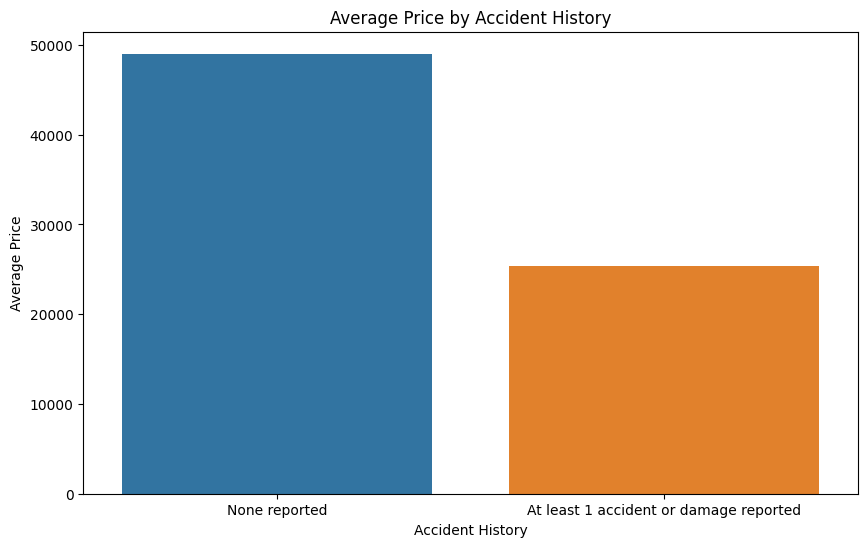

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x='accident', y='price', data=train, errorbar=None)
plt.title('Average Price by Accident History')
plt.xlabel('Accident History')
plt.ylabel('Average Price')
plt.show()

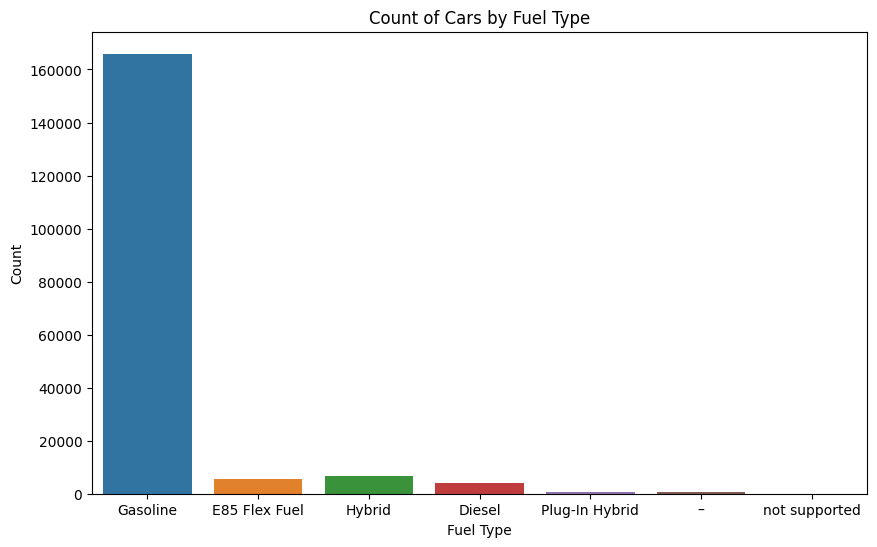

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel_type', data=train)
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

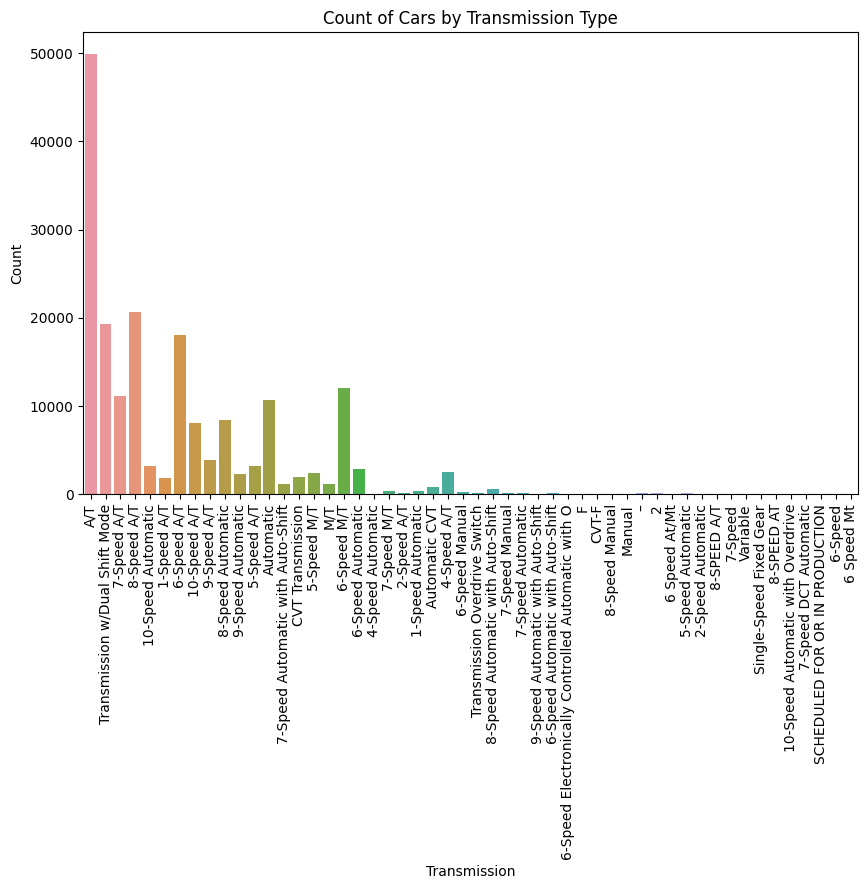

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(x='transmission', data=train)
plt.title('Count of Cars by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

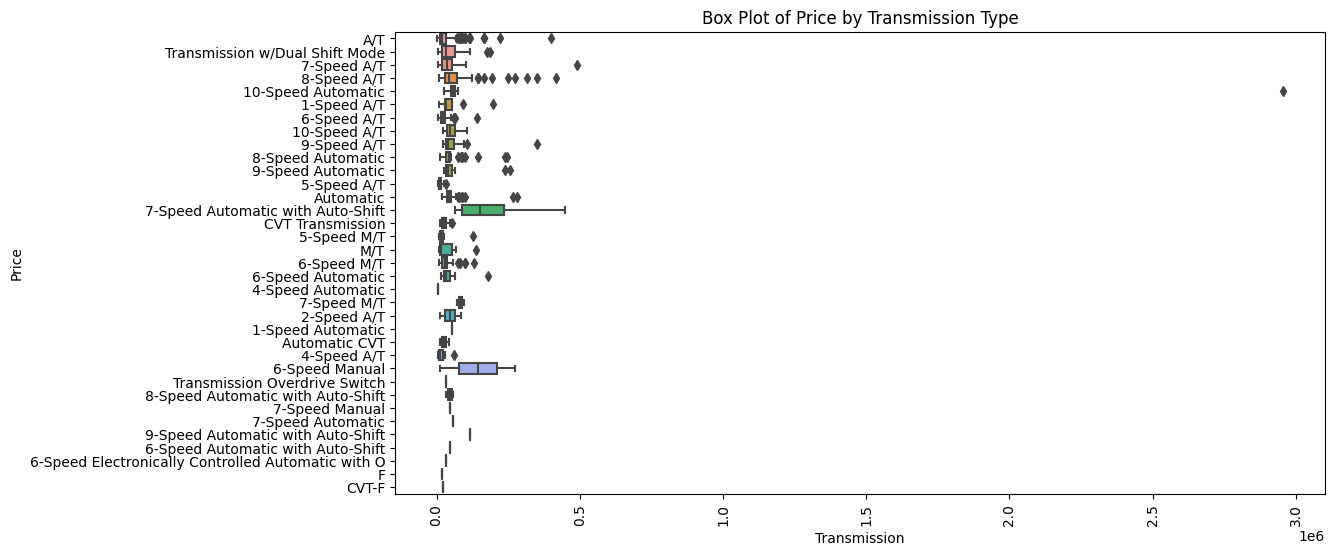

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='transmission', data=train[:1000],orient='h')
plt.title('Box Plot of Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.xticks(rotation=90) 
plt.show()

In [85]:
train.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [86]:
unique_values = train.select_dtypes(include=['object']).apply(lambda col: col.nunique())
print("--- Unique Values ---")
print(unique_values)

--- Unique Values ---
brand             57
model           1897
fuel_type          7
engine          1117
transmission      52
ext_col          319
int_col          156
accident           2
clean_title        1
dtype: int64


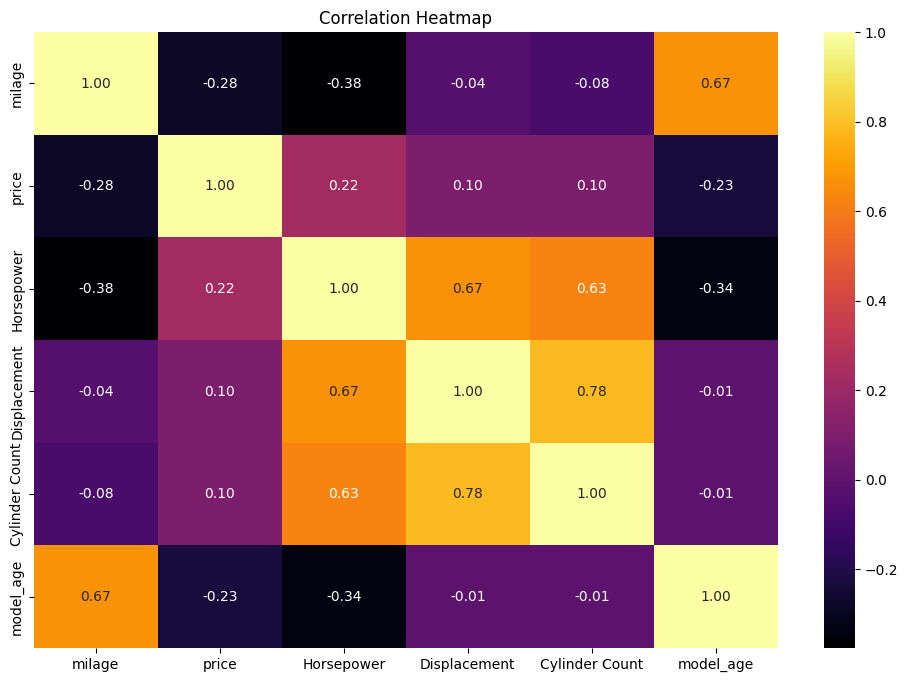

In [87]:
# Select only numerical columns for correlation
numeric_df = df_train.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='inferno', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

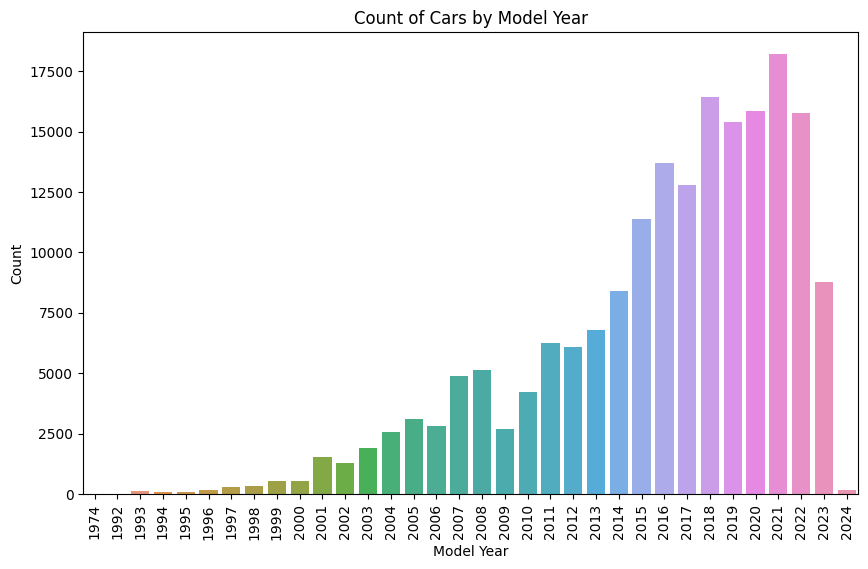

In [88]:
plt.figure(figsize=(10, 6))
sns.countplot(x='model_year', data=train)
plt.title('Count of Cars by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

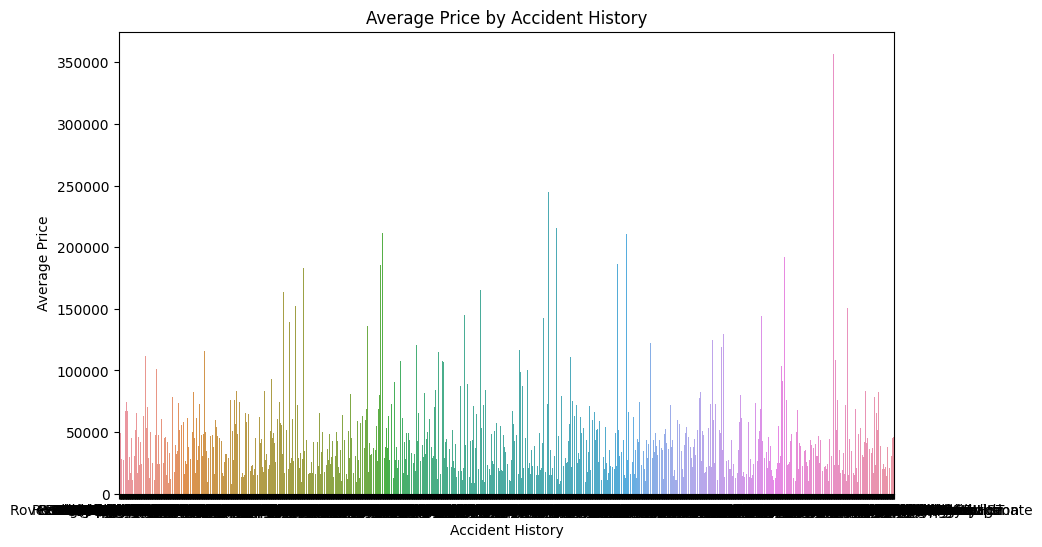

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='price', data=train, errorbar=None)
plt.title('Average Price by Accident History')
plt.xlabel('Accident History')
plt.ylabel('Average Price')
plt.show()

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


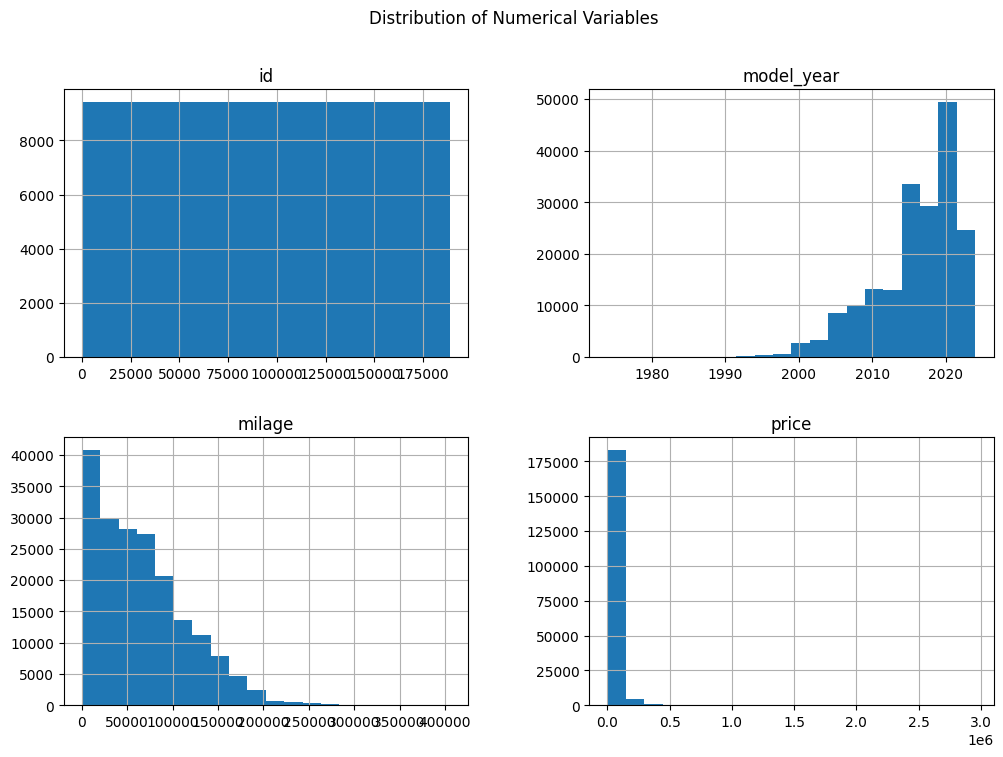

In [91]:
numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns
train[numerical_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

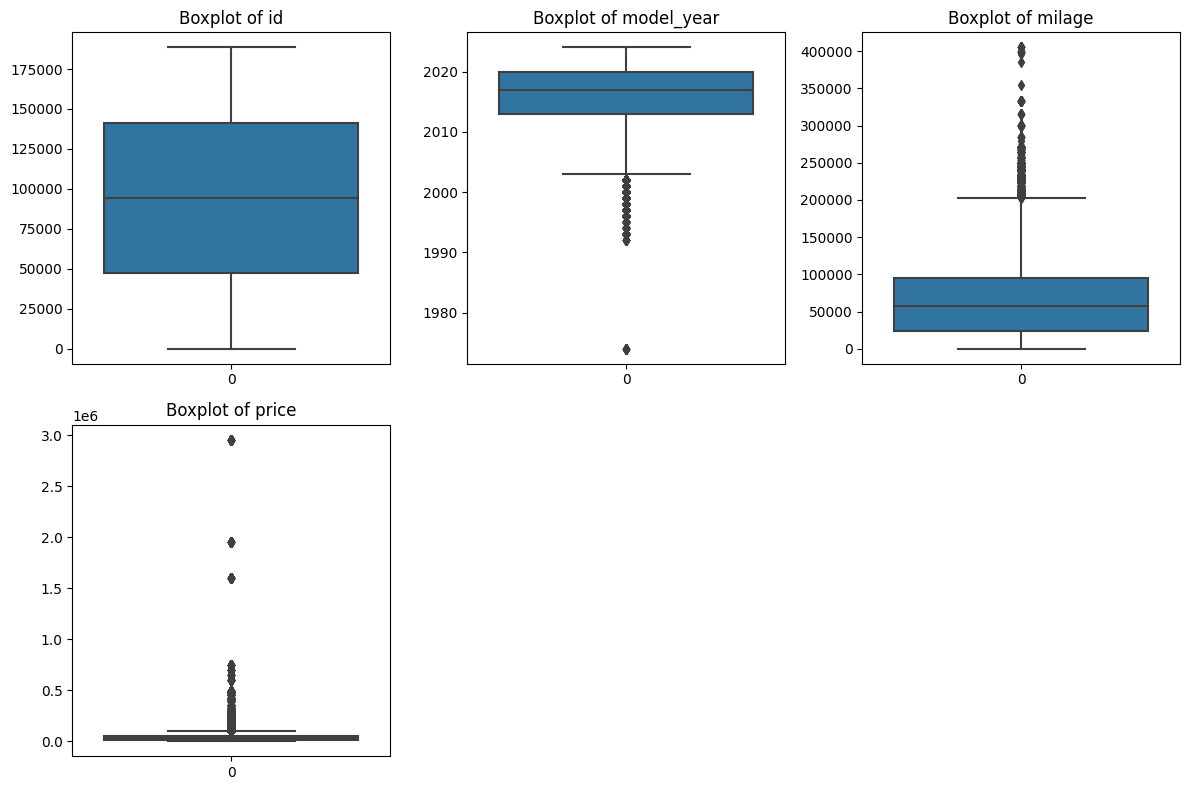

In [92]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(train[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

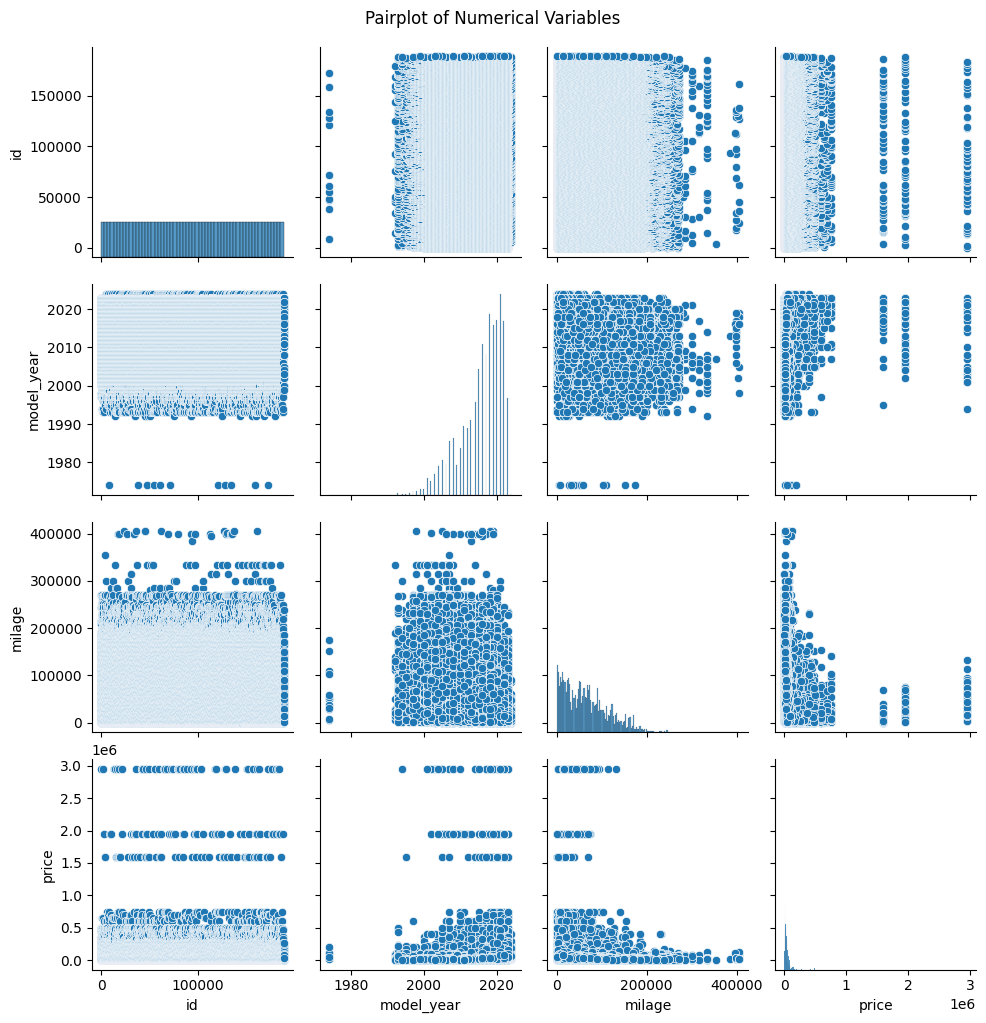

In [93]:
sns.pairplot(train[numerical_cols])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

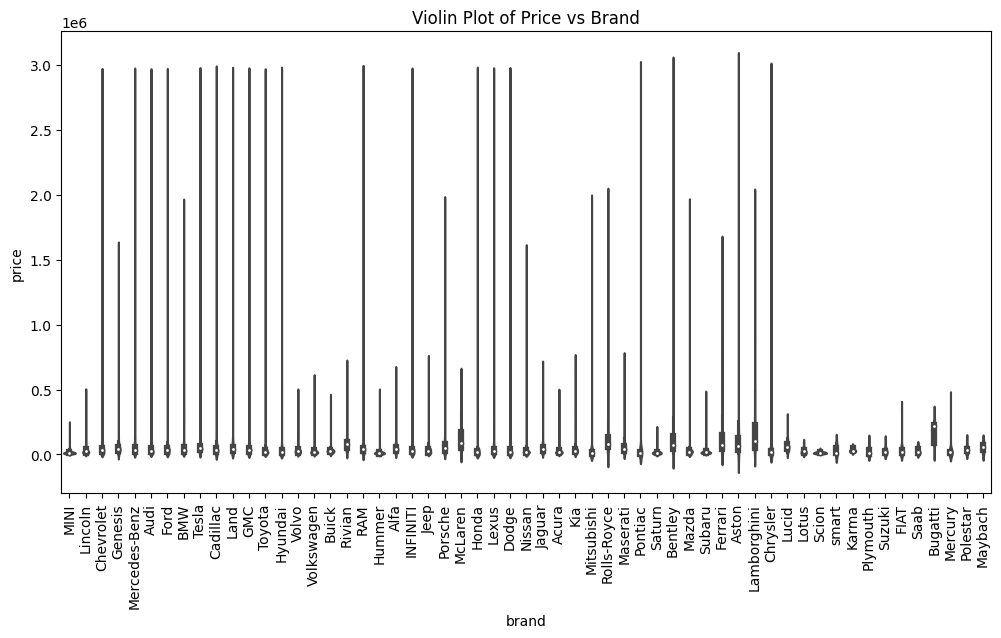

In [94]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='brand', y='price', data=train)
plt.xticks(rotation=90)
plt.title('Violin Plot of Price vs Brand')
plt.show()

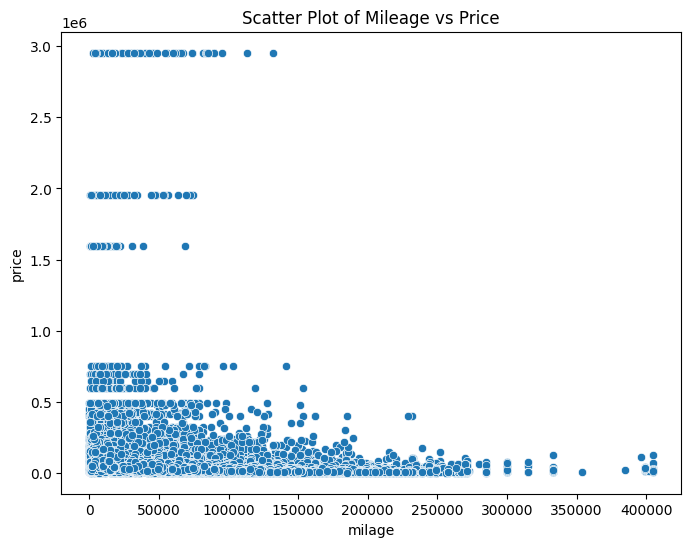

In [95]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='milage', y='price', data=train)
plt.title('Scatter Plot of Mileage vs Price')
plt.show()

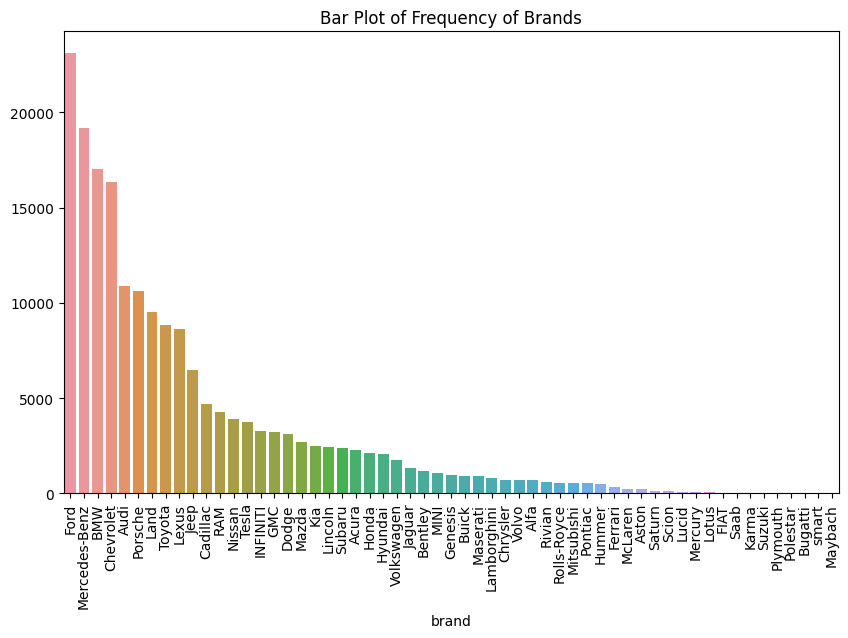

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(x=train['brand'].value_counts().index, y=train['brand'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Bar Plot of Frequency of Brands')
plt.show()

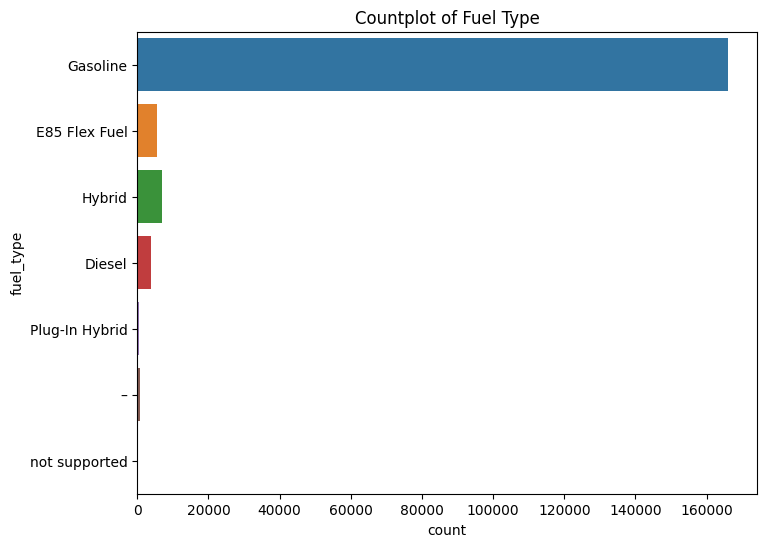

In [97]:
plt.figure(figsize=(8, 6))
sns.countplot(y=train['fuel_type'])
plt.title('Countplot of Fuel Type')
plt.show()

In [98]:
df_train_encoded.head()

,brand,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Displacement,Cylinder Count,model_age
0,31,213000,2,0,312,71,2,1,4200,172.0,1.6,4.0,18
1,28,143250,2,0,263,10,0,1,4999,252.0,3.9,8.0,23
2,9,136731,1,0,38,71,2,1,13900,320.0,5.3,8.0,23
3,16,19500,2,2,29,14,2,1,45000,420.0,5.0,8.0,8
4,36,7388,2,0,29,10,2,1,97500,208.0,2.0,4.0,4


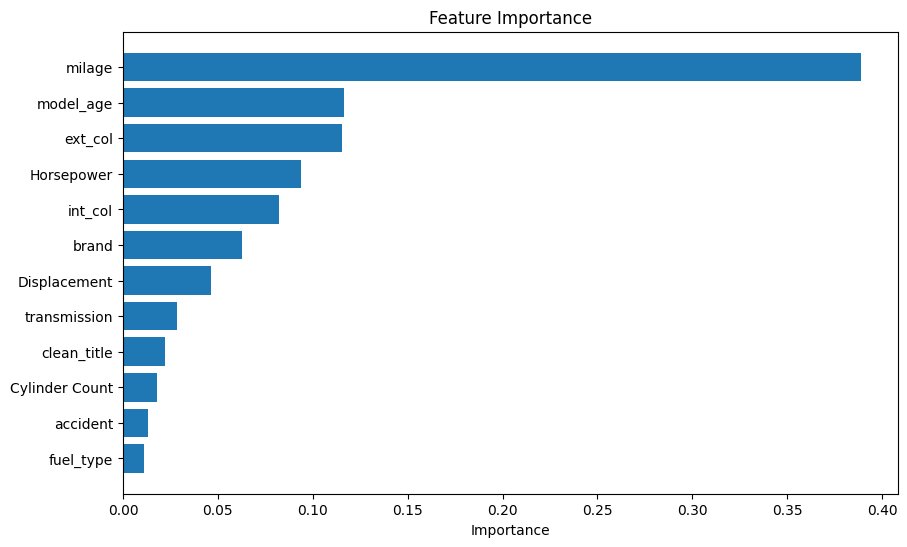

In [99]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_train_encoded.drop(columns=['price'])  # Dropping non-relevant columns like 'id' and 'model'
y = df_train_encoded['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Sort the feature importances in descending order
indices = importances.argsort()

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(X.columns)), importances[indices], align="center")
plt.yticks(range(len(X.columns)), [X.columns[i] for i in indices])
plt.xlabel("Importance")
plt.show()

# Clusturing

In [110]:
df=pd.read_csv("/kaggle/input/playground-series-s4e9/train.csv")
test=pd.read_csv("/kaggle/input/playground-series-s4e9/test.csv")

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


## K-means Clustering

In [114]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd


# Drop irrelevant columns
df_unsupervised = df.drop(columns=["id", "price"])

# Handle missing values (Fill categorical NaNs with 'Unknown', numerical with median)
for col in df_unsupervised.select_dtypes(include=["object"]).columns:
    df_unsupervised[col].fillna("Unknown", inplace=True)

imputer = SimpleImputer(strategy="median")
df_unsupervised[df_unsupervised.select_dtypes(include=["int64", "float64"]).columns] = imputer.fit_transform(
    df_unsupervised.select_dtypes(include=["int64", "float64"])
)

# Encode categorical variables
label_encoders = {}
for col in df_unsupervised.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df_unsupervised[col] = le.fit_transform(df_unsupervised[col])
    label_encoders[col] = le  # Store encoders for reference

# Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_unsupervised)

# Convert back to DataFrame for easy interpretation
df_scaled = pd.DataFrame(df_scaled, columns=df_unsupervised.columns)

# Display processed data
print(df_scaled.head())  # Instead of using ace_tools, just print or save the dataframe


<ipython-input-114-d8650203865f>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_unsupervised[col].fillna("Unknown", inplace=True)


      brand     model  model_year    milage  fuel_type    engine  \
0  0.493978 -0.713392   -1.559808  2.957842  -0.103097 -1.786099   
1  0.304919  0.120255   -2.443052  1.557184  -0.103097 -0.887343   
2 -0.892449  1.356353   -2.443052  1.426276  -1.514458  0.097693   
3 -0.451314 -0.209371    0.206679 -0.927854  -0.103097  0.899383   
4  0.809075  0.401970    0.913274 -1.171076  -0.103097 -1.272010   

   transmission   ext_col   int_col  accident  clean_title  
0      0.640494  1.349823  0.903317  0.475422     0.358008  
1      0.640494  0.922193 -0.627163 -1.816097     0.358008  
2      0.640494 -1.041414  0.903317  0.475422     0.358008  
3      1.486165 -1.119959 -0.526804  0.475422     0.358008  
4     -0.512694 -1.119959 -0.627163  0.475422     0.358008  


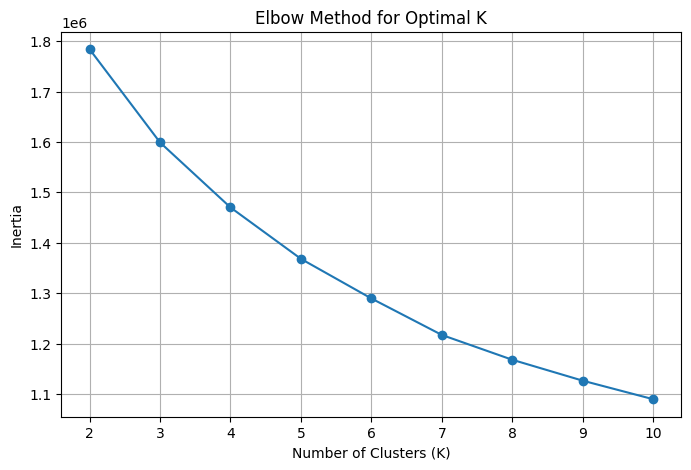

In [115]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(2, 11)  # Checking clusters from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()


In [116]:
# Apply K-Means clustering with the optimal number of clusters
optimal_k = 5  # Change based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)

# Display the clustered data
print(df_scaled.head())  # Show first few rows with cluster labels


      brand     model  model_year    milage  fuel_type    engine  \
0  0.493978 -0.713392   -1.559808  2.957842  -0.103097 -1.786099   
1  0.304919  0.120255   -2.443052  1.557184  -0.103097 -0.887343   
2 -0.892449  1.356353   -2.443052  1.426276  -1.514458  0.097693   
3 -0.451314 -0.209371    0.206679 -0.927854  -0.103097  0.899383   
4  0.809075  0.401970    0.913274 -1.171076  -0.103097 -1.272010   

   transmission   ext_col   int_col  accident  clean_title  Cluster  
0      0.640494  1.349823  0.903317  0.475422     0.358008        2  
1      0.640494  0.922193 -0.627163 -1.816097     0.358008        3  
2      0.640494 -1.041414  0.903317  0.475422     0.358008        2  
3      1.486165 -1.119959 -0.526804  0.475422     0.358008        1  
4     -0.512694 -1.119959 -0.627163  0.475422     0.358008        1  


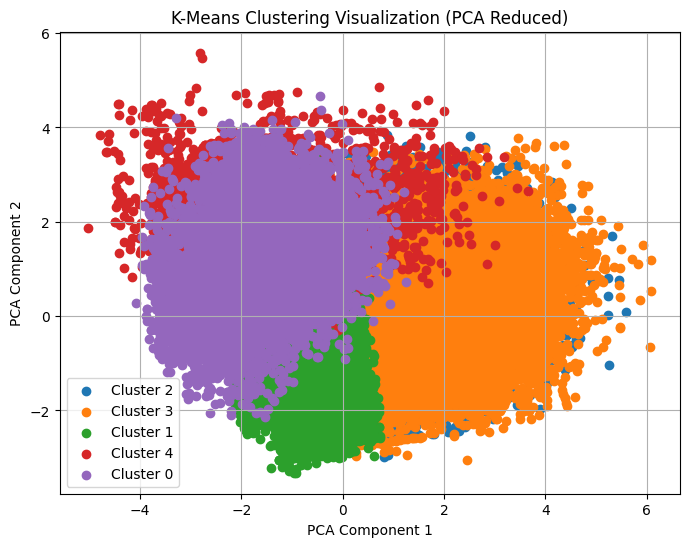

In [117]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop(columns=["Cluster"]))

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=["PCA1", "PCA2"])
df_pca["Cluster"] = df_scaled["Cluster"]

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in df_pca["Cluster"].unique():
    cluster_data = df_pca[df_pca["Cluster"] == cluster]
    plt.scatter(cluster_data["PCA1"], cluster_data["PCA2"], label=f"Cluster {cluster}")

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering Visualization (PCA Reduced)")
plt.legend()
plt.grid(True)
plt.show()


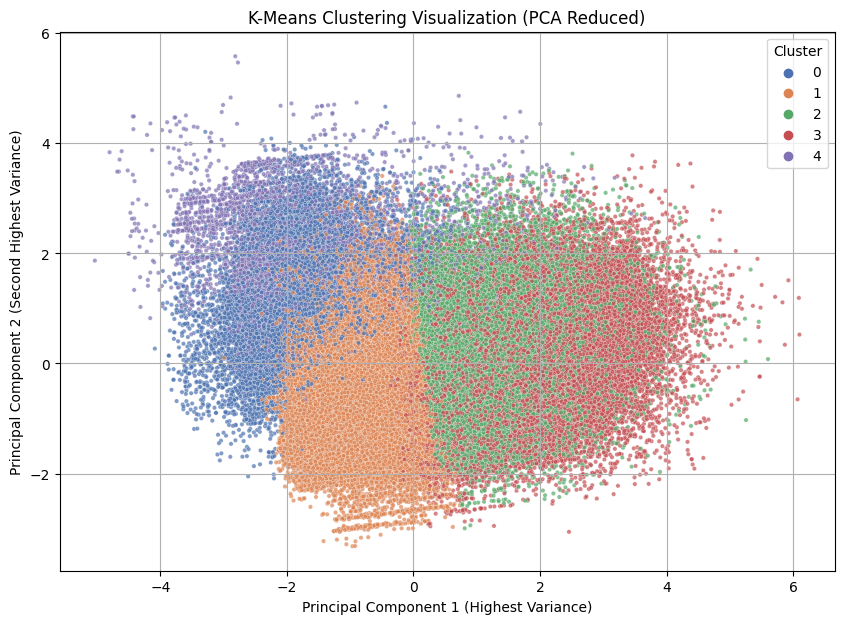

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop(columns=["Cluster"]))

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=["PCA Component 1", "PCA Component 2"])
df_pca["Cluster"] = df_scaled["Cluster"]

# Improved Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="PCA Component 1", y="PCA Component 2", hue="Cluster", palette="deep", data=df_pca, s=10, alpha=0.7
)

# Adding Labels
plt.xlabel("Principal Component 1 (Highest Variance)")
plt.ylabel("Principal Component 2 (Second Highest Variance)")
plt.title("K-Means Clustering Visualization (PCA Reduced)")
plt.legend(title="Cluster", loc="upper right")
plt.grid(True)
plt.show()


In [119]:
import numpy as np
import pandas as pd

# Get the PCA components (loadings)
pca_loadings = pd.DataFrame(
    np.abs(pca.components_),  # Taking absolute values for easy comparison
    columns=df_scaled.drop(columns=["Cluster"]).columns,  # Use original column names
    index=["PCA1", "PCA2"]  # Naming components
)

# Display which features contribute most to PCA1 and PCA2
print(pca_loadings.T.sort_values(by="PCA1", ascending=False).head(5))  # Top 5 features for PCA1
print(pca_loadings.T.sort_values(by="PCA2", ascending=False).head(5))  # Top 5 features for PCA2


                 PCA1      PCA2
milage       0.570902  0.070494
model_year   0.547323  0.069204
accident     0.366831  0.001327
engine       0.338592  0.333686
clean_title  0.292757  0.351718
                 PCA1      PCA2
brand        0.013349  0.464656
int_col      0.052099  0.430280
fuel_type    0.179841  0.375518
model        0.013103  0.352262
clean_title  0.292757  0.351718
